In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:
sales = pd.read_csv("/content/advertising.csv")
sales

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


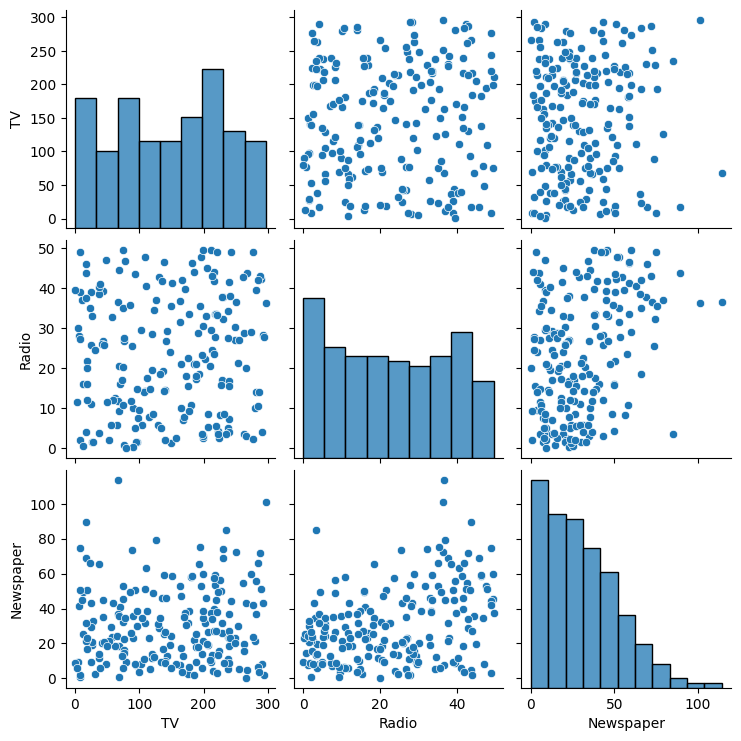

In [ ]:
sns.pairplot(sales, vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="scatter")
plt.show()

In [ ]:
x=sales.drop(["Sales"], axis=1)
y=sales["Sales"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
y_train

134    10.8
66     11.0
26     15.0
113    20.9
168    17.1
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: Sales, Length: 160, dtype: float64

In [ ]:
preprocess= Pipeline([("scaler", StandardScaler())])
model = Pipeline([("preprocess", preprocess),("regressor", RandomForestRegressor())])
model.fit(x_train, y_train)

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('regressor', RandomForestRegressor())])

In [ ]:
y_test_predict= model.predict(x_test)
r2_score(y_test, y_test_predict)

0.9463846856172159